# Predicting Red Wine Quality
## Phase 2: Statistical Modelling

#### Group Name: Group 21

#### Name(s) & ID(s) of Group Members:
Samuel Yoshikazu Lausberg - (s3948914)

Michael Xie - (s3943224)
#### 

## Table of Contents
- [Introduction](#intro)
    - [Phase 1 Summary](#p1sum)
    - [Report Overview](#ro)
    - [Overview of Methodology](#om)
- [Statistical Modelling](#sm)
    - [Full Model Overview](#fmo)
    - [Full Model Diagnostic Checks](#fmd)
    - [Feature Selection](#fs)
    - [Reduced Model Overview](#rmo)
    - [Reduced Model Diagnostic Checks](#rmd)
- [Critique & Limitations](#cl)
- [Summary & Conclusions](#sc)
    - [Project Summary](#ps)
    - [Summary of Findings](#sf)
    - [Conclusions](#con)

## Introduction <a id='intro'></a>

### Phase 1 Summary <a id='p1sum'></a>

In phase 1 of this assignment, we first outlined our goals for this project and took a look at the variables in the dataset. We then looked to clean, process and prepare our dataset on red wine quality which mainly included clamping outlier values for some of the columns. This ensured the data was clean for use. Finally, we explored the variables through visualisations with varying numbers of variables and looked for any potential correlations with our target variable. 

### Report Overview <a id='ro'></a>

Our report contains two linear regression models, full model and reduced model. The full model includes all columns (except quality) from the dataset as independent variables, whereas the reduced model using backwards feature selection which further excluded the four columns density, residual_sugar, fixed_acidity and citric_acid due to their high recalculated p-values (0.5027, 0.5827, 0.1723 and 0.05118 respectively).

The full model and the reduced model had adjusted R^2 values of 0.365 and 0.364 respectively.

In our standardized full model, the three features with the highest magnitude coefficients where alcohol, volatile acidity and sulphates (0.3613, -0.2324 and 0.2094 respectively).

From our diagnostic checks to check for violation of regression assumptions, we found that our models somewhat satisfied the normal distribution of residuals, but violated constant variance of errors.

### Overview of Methodology <a id='om'></a>

Before we did any modelling, we changed the column names to exclude spaces such that it becomes compatible with the statsmodel api library used for creating our regression models. The next step we undertook in phase 2 was constructing a full regression model. This used all columns from the dataset (except quality) as independent variables to predict our dependent variable, quality. We then checked the full model for indications of violations of the regression assumptions by graphing the residuals, actual qualities and predicted qualities. After having completed the full model, we then repeated the steps for a reduced regression model. To construct the reduced regression model, we used backwards feature selection to exclude columns with recalculated p-values exceeding the significance level of 0.05. 

## Statistical Modelling <a id='sm'></a>

### Full Model Overview <a id='fmo'></a>

#### Module Imports

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('Phase2_Group21.csv', sep=';')

#### Outlier Clamping

In [79]:
outlier_categories = df.columns
outlier_categories = outlier_categories.delete(11) #Remove quality (Target Feature)

for category in outlier_categories:
    q1 = df[category].quantile(0.25)
    q3 = df[category].quantile(0.75)
    iqr = q3 - q1
    bot_out = round(q1 - 1.5*iqr, 2)
    top_out = round(q3 + 1.5*iqr, 2)

    df.loc[df[category] < bot_out, category] = bot_out
    df.loc[df[category] > top_out, category] = top_out

#### Fixing Column Names

Some column names contain spaces which may be problematic when creating the formula string for statsmodel. To be extra safe, we replaced the spaces with underscores.

In [80]:
df.columns = [colname.replace(' ', '_') for colname in list(df.columns)]
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Constructing Formula String

We construct our formula string by using string join of independent variable names seperated by ' + ' which is then joined with the name of our dependent variable separated by ' ~ '.

In [81]:
dep_var = 'quality'
formula_string_indep_vars = ' + '.join(df.drop(columns=dep_var).columns)
formula_string = dep_var + ' ~ ' + formula_string_indep_vars
print('formula_string: ', formula_string)

formula_string:  quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol


#### Linear Regression Full Model

In [82]:
model_full = sm.formula.ols(formula=formula_string, data=df)
model_full_fitted = model_full.fit()
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     84.49
Date:                Fri, 21 Oct 2022   Prob (F-statistic):          3.44e-150
Time:                        17:55:03   Log-Likelihood:                -1558.1
No. Observations:                1599   AIC:                             3140.
Df Residuals:                    1587   BIC:                             3205.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               20.3302 

The full model has an adjusted R-squared value of 0.365, which means that 36.5% of the variation of the dependent variable (quality) is explained by the indepedent variables. By observing the p-values for each feature, we can see that about half of them are significant where their p-value is lower than 0.05.

#### Linear Regression Standardize Full Model

In [83]:
df_z = df.apply(stats.zscore)
std_model_full = sm.formula.ols(formula=formula_string, data=df_z)
std_model_full_fitted = std_model_full.fit()
print(std_model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     84.49
Date:                Fri, 21 Oct 2022   Prob (F-statistic):          3.44e-150
Time:                        17:55:03   Log-Likelihood:                -1900.3
No. Observations:                1599   AIC:                             3825.
Df Residuals:                    1587   BIC:                             3889.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.179e-15 

To check the importance of each independent variable, we must first standardize the values in each column of the data frame. Next we construct a full linear regression model with the standardize values. Finally we can observe the magnitude of the coefficients to determine which independent variables contribute the most to finding the quality score.

We did this because each indenpdent variable may be scaled differently. For example, the dataset values for a column may be very small which may cause the coefficient to be large.

From the standardized coefficients, we can see that alcohol, volatile acidity and sulphates have the highest magnitudes of 0.3613, -0.2324 and 0.2094 respectively and therefore are the top three most important variables for determining the wine quality.

We will now define a data frame for the actual quality vs predicted quality and residuals for the full model.

In [84]:
residuals_full = pd.DataFrame({'actual': df[dep_var], 
                               'predicted': model_full_fitted.fittedvalues, 
                               'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,5,5.030193,-0.030193
1,5,5.171483,-0.171483
2,5,5.227244,-0.227244
3,6,5.657863,0.342137
4,5,5.030193,-0.030193
5,5,5.062826,-0.062826
6,5,5.078804,-0.078804
7,7,5.316276,1.683724
8,7,5.346399,1.653601
9,5,5.674847,-0.674847


We will now graph the scatter plot for actual vs predicted quality.

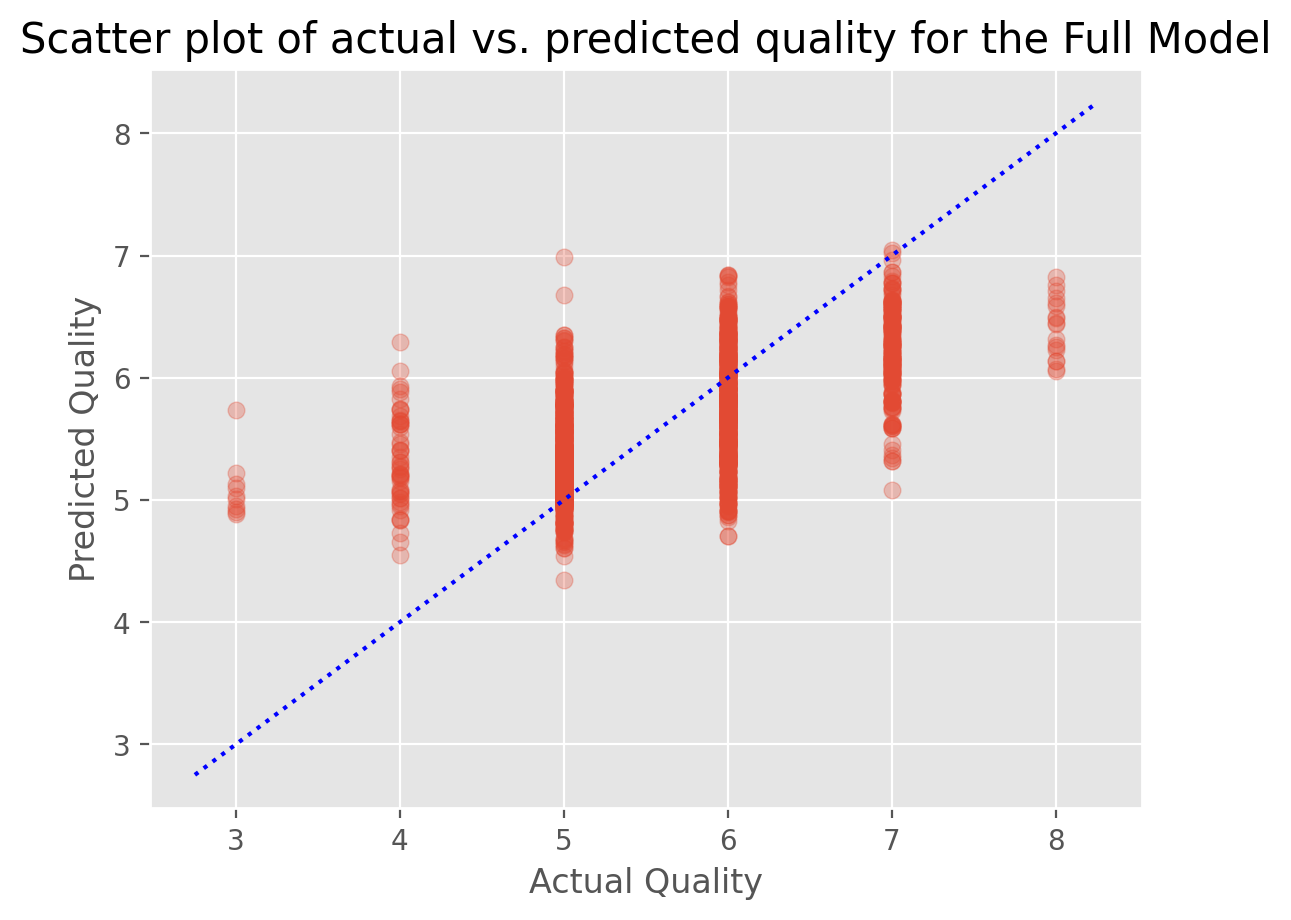

In [85]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="blue", linestyle=":");
plt.xlabel('Actual Quality');
plt.ylabel('Predicted Quality');
plt.title('Scatter plot of actual vs. predicted quality for the Full Model', fontsize=15);

From the above figure, we can see that the full model never produces a prediction above 7, even though the highest quality is 8.

We will now check the validity of a linear model on this dataset.

### Full Model Diagnostic Checks <a id='fmd'></a>

We will now check for indications of violations of the regerssion assumptions which includes:

1. linearity of the relationship between target variable and the independent variables
2. constant variance of the errors
3. normality of the residual distribution
4. statistical independence of the residuals


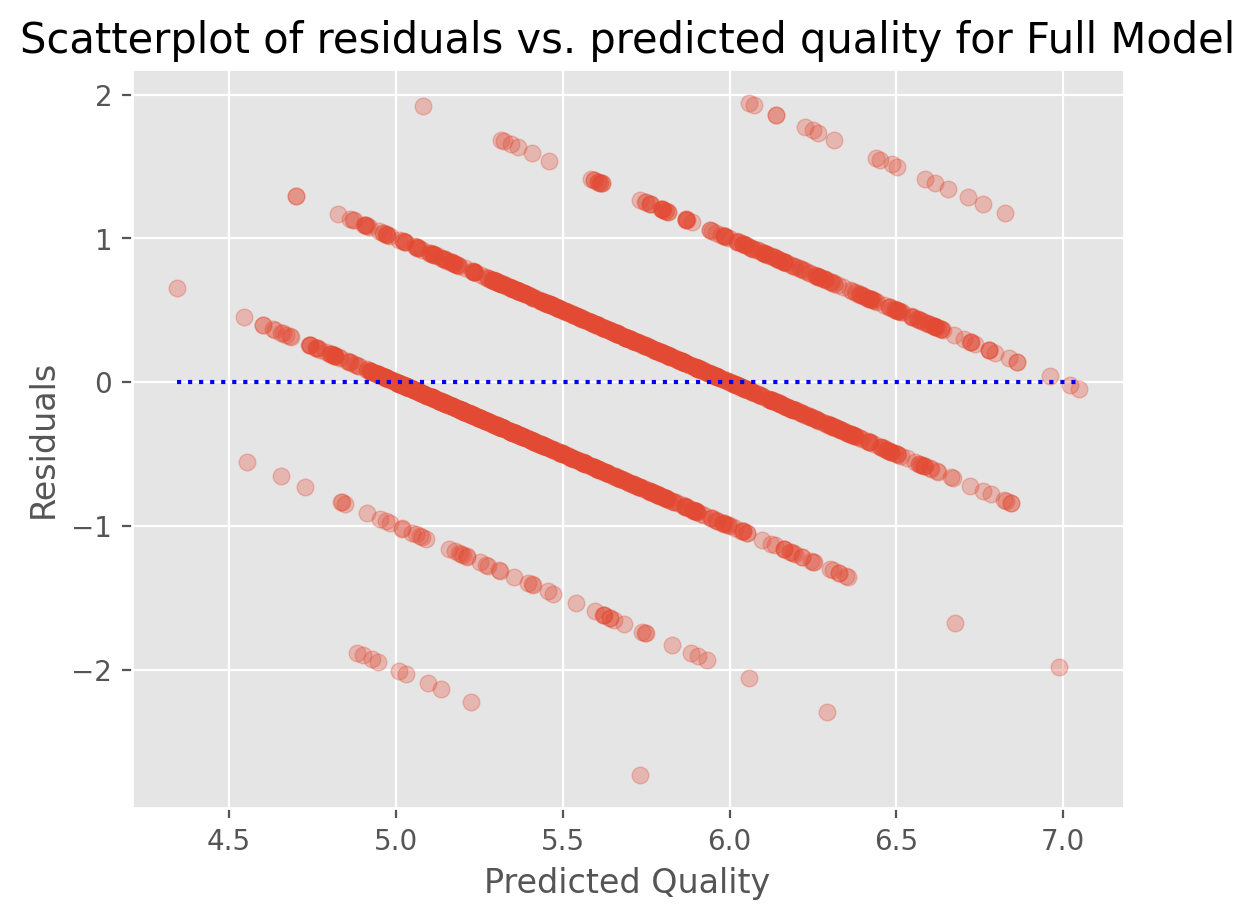

In [86]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);  
plt.plot([residuals_full['predicted'].min(), residuals_full['predicted'].max()], [0, 0], color='blue', linestyle=':')
plt.xlabel('Predicted Quality');
plt.ylabel('Residuals')
plt.title('Scatterplot of residuals vs. predicted quality for Full Model', fontsize=15)
# plt.subplot(1, 2, 2)
# res_prequality()
# plt.title('Scatterplot of *scaled* residuals vs. predicted quality for Full Model', fontsize=15)
# plt.ylim(-8, 8)

plt.show()

Due to the discrete nature of our target variable, the residuals form lines, making this particular graph harder to analyse.

This graph shows the residuals forming an almost elliptical shape, violating the assumption of constant variance of the errors.

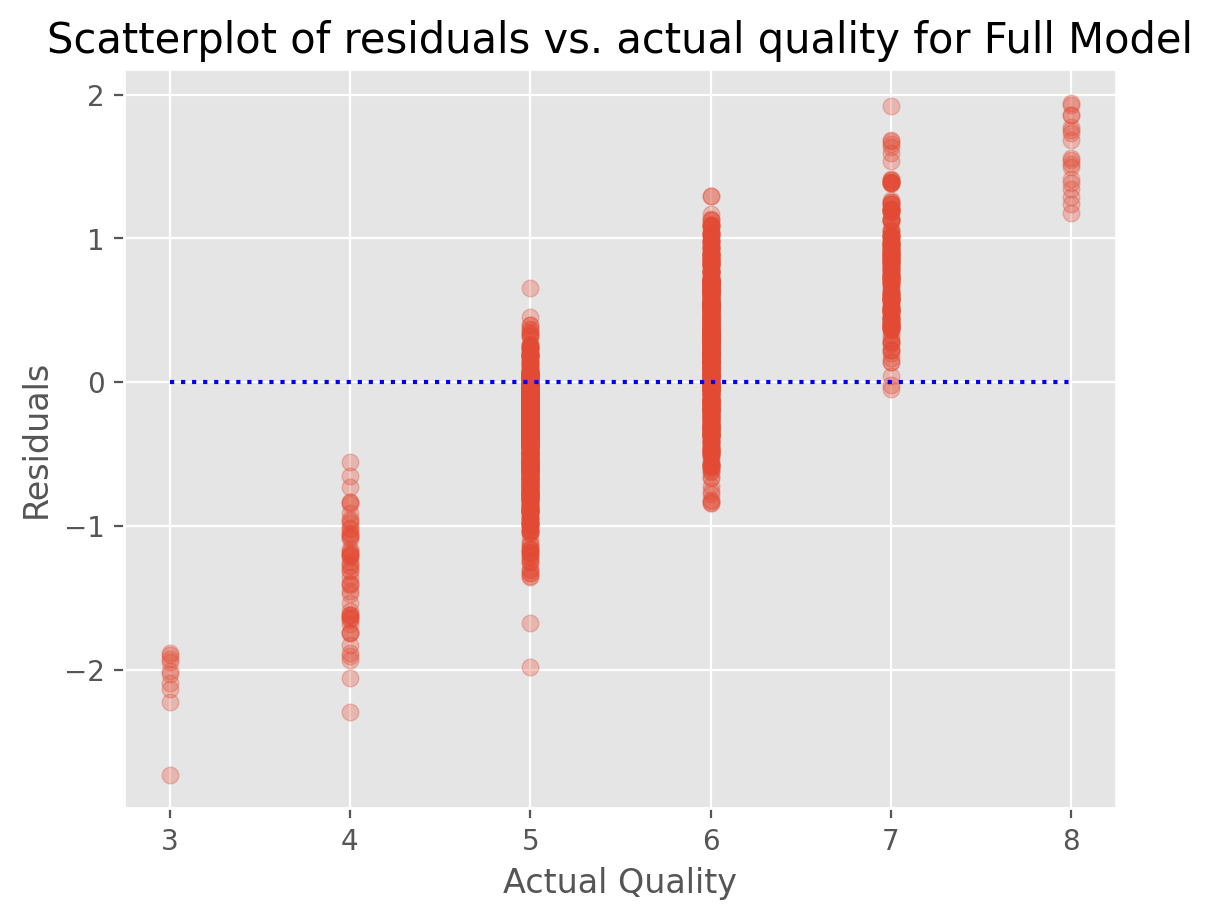

In [87]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.plot([residuals_full['actual'].min(), residuals_full['actual'].max()], [0, 0], color='blue', linestyle=':')
plt.xlabel('Actual Quality');
plt.ylabel('Residuals')
plt.title('Scatterplot of residuals vs. actual quality for Full Model', fontsize=15)
plt.show();

From the above graph, we can see that for the lower values of 3-5 the model generally underpredicted lower quality scores, while for the upper values of 7-8, the model generally overpredicted higher quality scores.

For the outer values of 3 and 8, the residual spread of the model was significantly lower than the middle values 4-7.

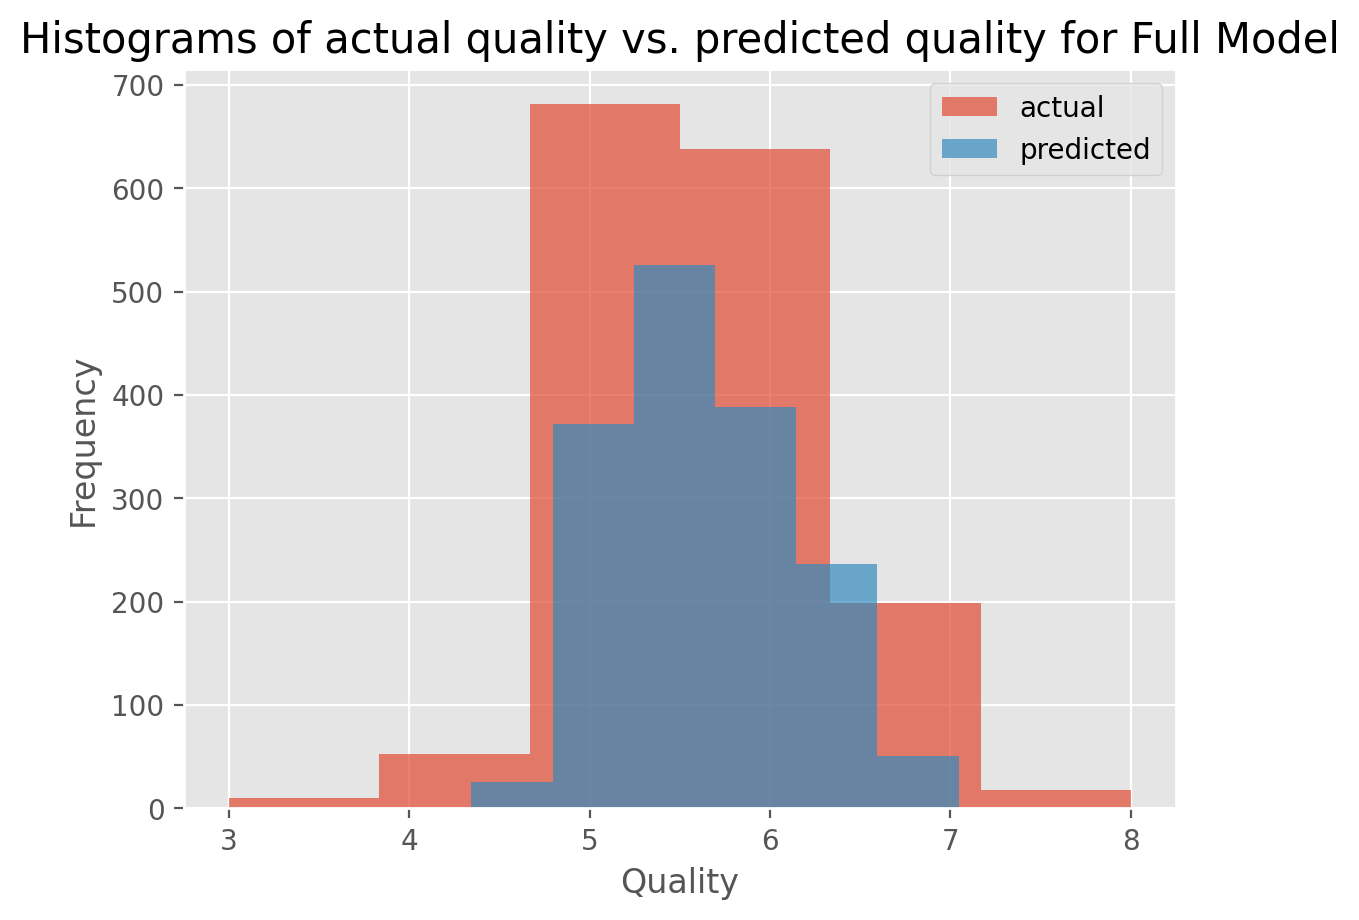

In [88]:
plt.hist(residuals_full['actual'], label='actual', bins=6, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=6, alpha=0.7);
plt.xlabel('Quality');
plt.ylabel('Frequency');
plt.title('Histograms of actual quality vs. predicted quality for Full Model', fontsize=15);
plt.legend()
plt.show();

The distributions of the predicted model and the actual quality are relatively similar. With the predicted model being closer to a normal distribution. Although both models are highly clustered around the centre values 5-6.

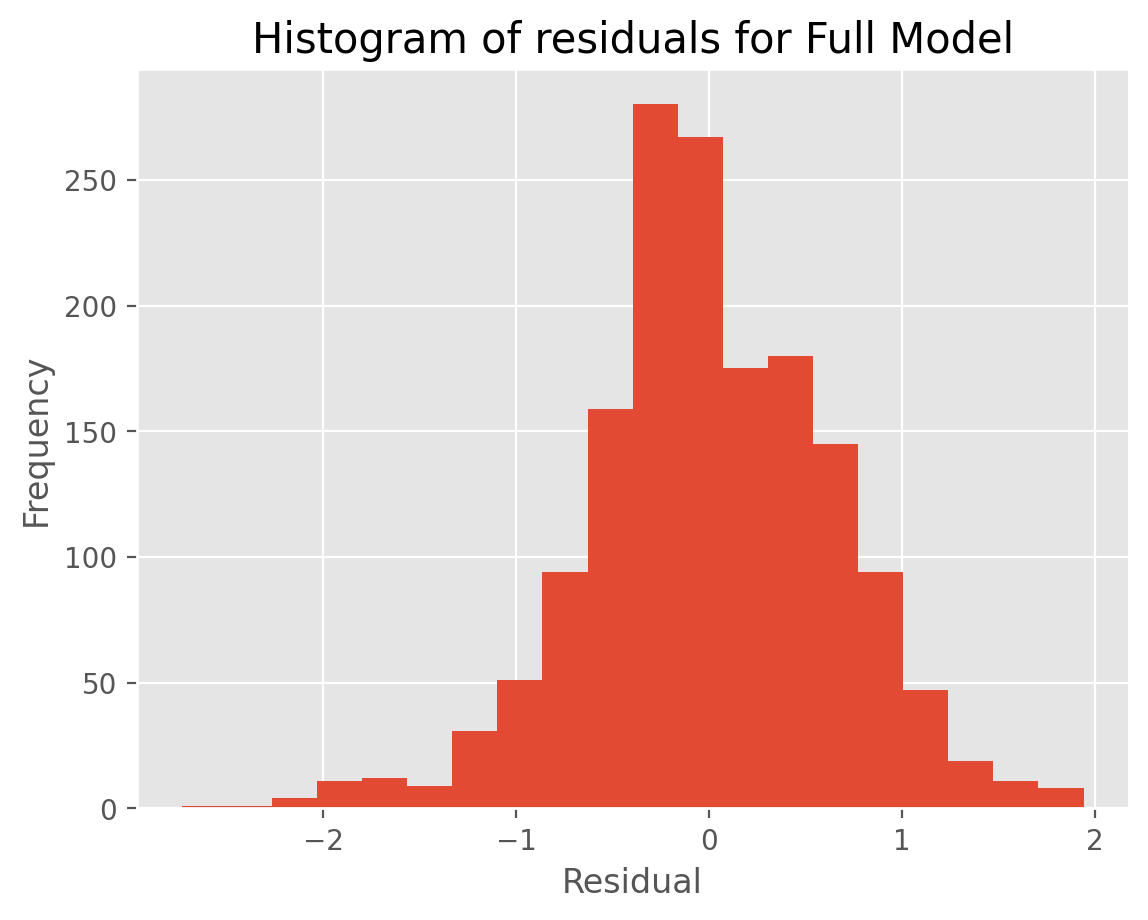

In [89]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Histogram of residuals for Full Model', fontsize=15);
plt.show();

The distribution of residuals on the above histogram is nearly normal, being mostly symmetric and not significantly skewed. The distribution is almost centred around 0. We can conclude that the normality assumption of residuals is not significantly violated here.

### Feature Selection <a id='fs'></a>

You can use the code below to to perform backward feature selection using p-values ([credit](https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb)).

In [90]:
def backwards_feature_selection(df):
    ## create the patsy model description from formula
    patsy_description = patsy.ModelDesc.from_formula(formula_string)

    # initialize feature-selected fit to full model
    linreg_fit = model_full_fitted

    # do backwards elimination using p-values
    p_val_cutoff = 0.05

    ## WARNING 1: The code below assumes that the Intercept term is present in the model.
    ## WARNING 2: It will work only with main effects and two-way interactions, if any.

    print('\nPerforming backwards feature selection using p-values:')

    while True:

        # uncomment the line below if you would like to see the regression summary
        # in each step:
        ### print(linreg_fit.summary())

        pval_series = linreg_fit.pvalues.drop(labels='Intercept')
        pval_series = pval_series.sort_values(ascending=False)
        term = pval_series.index[0]
        pval = pval_series[0]
        if (pval < p_val_cutoff):
            break
        term_components = term.split(':')
        print(f'\nRemoving term "{term}" with p-value {pval:.4}')
        if (len(term_components) == 1): ## this is a main effect term
            patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
        else: ## this is an interaction term
            patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                            patsy.EvalFactor(term_components[1])]))    

        linreg_fit = smf.ols(formula=patsy_description, data=df).fit()

    ###
    ## this is the clean fit after backwards elimination
    model_reduced_fitted = smf.ols(formula=patsy_description, data=df).fit()
    ###

    #########
    print("\n***")
    print(model_reduced_fitted.summary())
    print("***")
    print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
    print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
    print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
    print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")

backwards_feature_selection(df)


Performing backwards feature selection using p-values:

Removing term "density" with p-value 0.5027

Removing term "residual_sugar" with p-value 0.5827

Removing term "fixed_acidity" with p-value 0.1723

Removing term "citric_acid" with p-value 0.05118

***
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     131.7
Date:                Fri, 21 Oct 2022   Prob (F-statistic):          6.07e-153
Time:                        17:55:05   Log-Likelihood:                -1561.3
No. Observations:                1599   AIC:                             3139.
Df Residuals:                    1591   BIC:                             3182.
Df Model:                           7                                         
Covariance Type:            no

The reduced model has an adjusted R-squared value of 0.364, which means that 36.4% of the variation of the dependent variable (quality) is explained by the indepedent variables that have a p value below the 5% significance level. This is a small difference to the full model adjusted R-square value of 0.365.

We will now define a data frame for actual quality vs predicted quality and the residuals for the reduced model.

In [91]:
residuals_reduced = pd.DataFrame({'actual': df[dep_var], 
                                  'predicted': model_reduced_fitted.fittedvalues, 
                                  'residual': model_reduced_fitted.resid})
residuals_reduced.head(10)

,actual,predicted,residual
0,5,5.014074,-0.014074
1,5,5.131436,-0.131436
2,5,5.193728,-0.193728
3,6,5.657730,0.342270
4,5,5.014074,-0.014074
5,5,5.043504,-0.043504
6,5,5.047715,-0.047715
7,7,5.294327,1.705673
8,7,5.300001,1.699999
9,5,5.673917,-0.673917


### Reduced Model Overview <a id='rmo'></a>

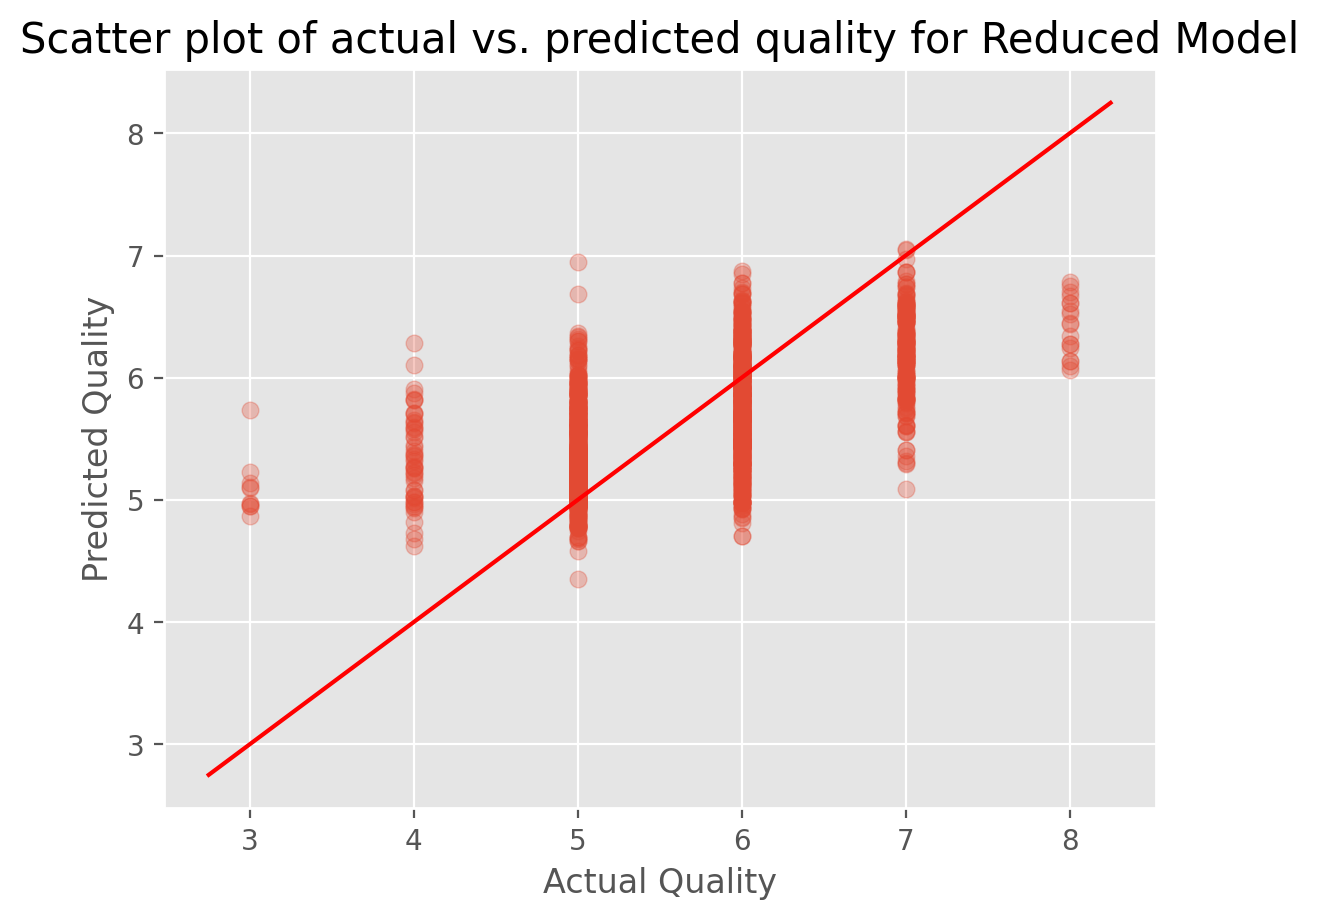

In [92]:
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Quality');
plt.ylabel('Predicted Quality');
plt.title('Scatter plot of actual vs. predicted quality for Reduced Model', fontsize=15);
plt.show(); 

From the scatterplot above, we can see that the reduced model has the same issues as the full model such that the model overestimates lower qualities and underestimates higher qualities. We can also see that the graph still cannot predict a quality over 7, even though the highest quality score is 8.

### Reduced Model Diagnostic Checks <a id='rmd'></a>

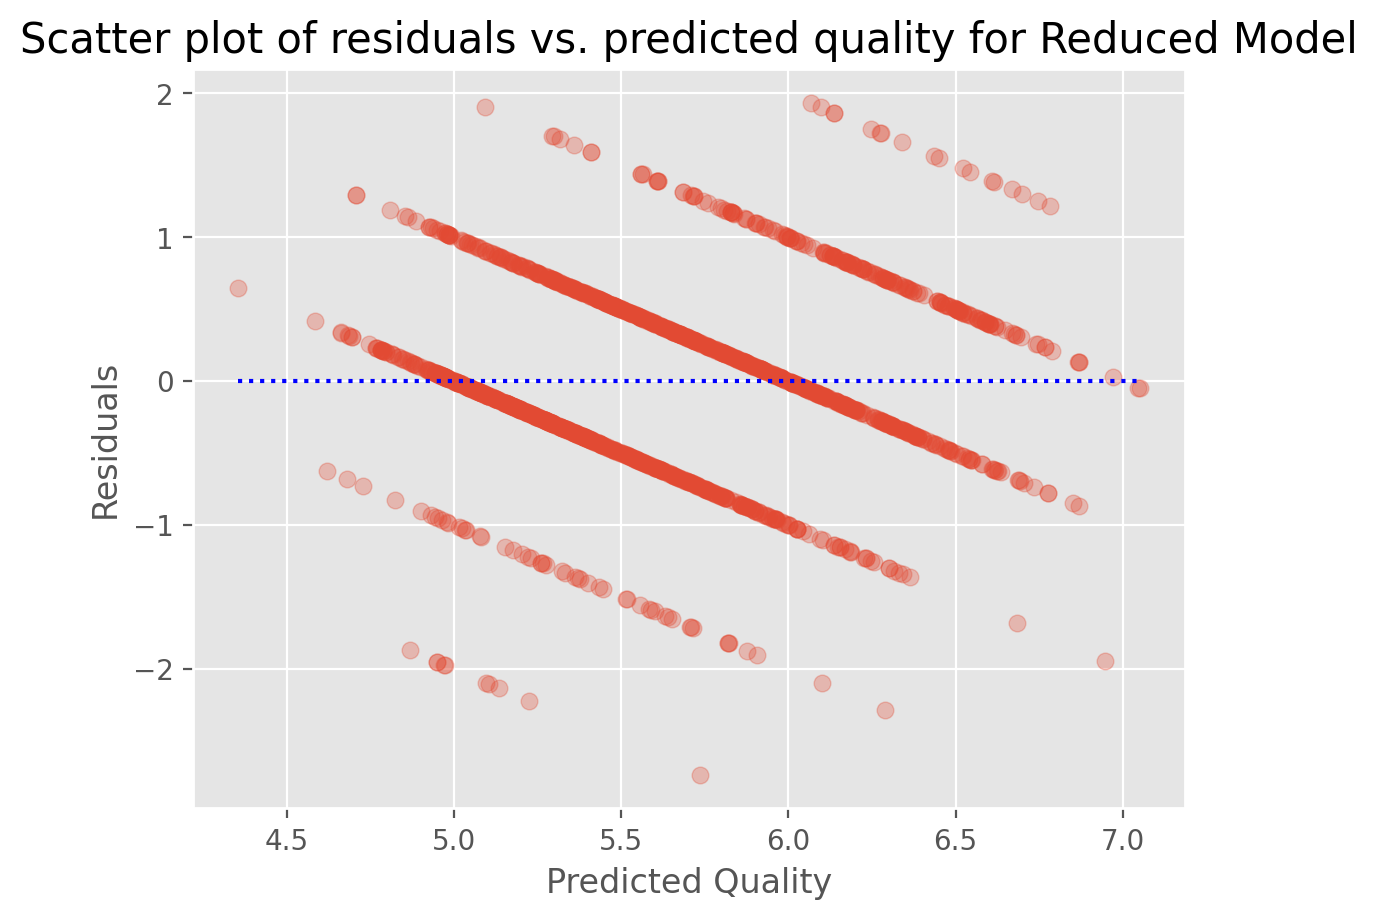

In [93]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.plot([residuals_reduced['predicted'].min(), residuals_reduced['predicted'].max()], [0, 0], color="blue", linestyle=":")
plt.xlabel('Predicted Quality');
plt.ylabel('Residuals')
plt.title('Scatter plot of residuals vs. predicted quality for Reduced Model', fontsize=15)
plt.show();

This graph looks very similar to the corresponding full model graph, again showing a violation of the assumption of constant variance of error.

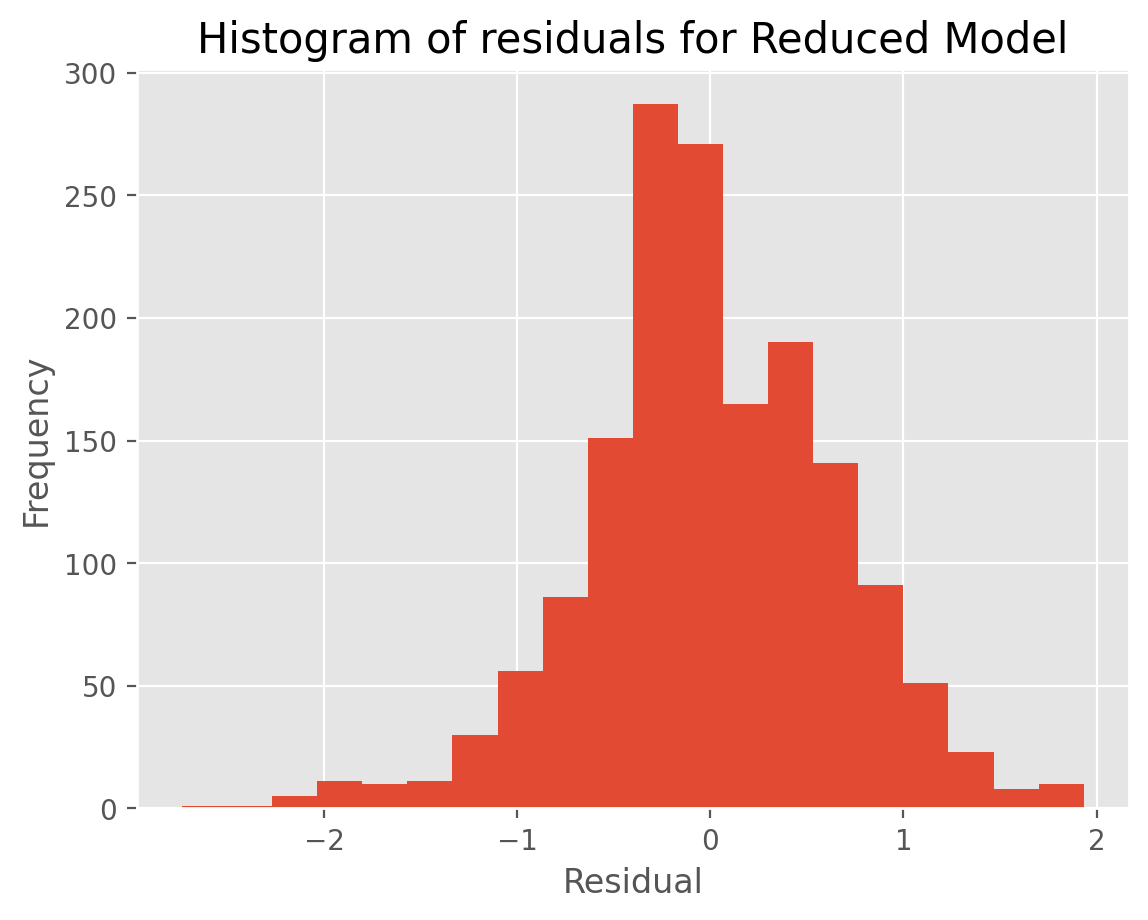

In [94]:
plt.hist(residuals_reduced['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

Just like the full model, the distribution of residuals for the reduced model is nearly normal, being mostly symmetric and not significantly skewed. The distribution is almost centred around 0. We can conclude that the normality assumption of residuals is not significantly violated here.

## Critique & Limitations <a id='cl'></a>

A limitation of our dataset was that the target variable (quality) was a discrete value which made analysing graphs such as the residuals vs predicted quality difficult to utilise in identifying violations of the regression assumptions. 

Notably, the 2nd assumption of regression on the constant variance of errors appeared to be violated in the residual vs predicted quality scatterplot as the plots formed an almost elliptical shape.

Overall, our model was not very accurate, with a low adjusted R^2 value for both the full model (0.365) and reduced model (0.364). This meant that a low percentage of the target variable (quality) was explained by the independent variables.

## Summary & Conclusions <a id='sc'></a>

### Project Summary <a id='ps'></a>

In phase 1, we first ensured that the dataset values fell into expected ranges given the context of the column they are in. Then we clamp any outliers such that no columns values are outside the lower and upper fences (Q1 – (1.5 * IQR) and Q3 + (1.5 * IQR)). Finally we created uni-variate, bi-variate and tri-variate visualtions of the dataset to look for any relationships.

In phase 2, we first replaced spaces with underscores in the column names for our data frame. This is so when we construct the formula string later on, it will be compatibile with the statsmodel api. Next we constructed the full model with the formula string and performed diagnostic checks for regression assumption violations by using visualisations of residuals, predicted and actual values. After, we constructed the reduced model using backward feature selection, which excluded inpendent variables with recalculated p-values above the 5% significance and performed similar diagnostic checks as for the full model.

### Summary of Findings <a id='sf'></a>

Our full model and reduced model had similarly low adjusted R^2 scores of 0.365 and 0.364 respectively. The columns we removed for the reduced model using backwards feature selection included density, residual sugar, fixed acidity and citric acid with respective recalculated p-values of 0.5027, 0.5827, 0.1723 and 0.05118. These columns p-values were above the 0.05 significance level and therefore did not have much significance to the quality score. After removing these values, our adjusted R^2 score did not change much (0.365 to 0.364) which was to be expected. 

For our standardize full model, the three features with the highest magnitude coefficients were alcohol, volatile acidity and sulphates which were 0.3613, -0.2324 and 0.2094 respectively.

### Conclusions <a id='con'></a>

We failed the main objective of creating a linear regression model that would accurately predict red wine quality. This was reflected by the low adjusted R^2 value in both the full (0.365) and reduced models (0.364), which meant that only ~36% of the variance in the depedent variable was explained by the indepedent variables. Our second objective was to find the indepedent variables with the most impact on the quality of the red wine. In the standardized full model, we found the three features with the highest magnitude coefficients to be alcohol (0.3613), volatile acidity (-0.2324) and sulphates (0.2094). Based on this result, to increase the wine quality the most, we should increase the percentage of alcohol, and the amount of potassium sulphate (sulphates) while decreasing acetic acid (volatile acidity).

From this report, we can confidently say that more work needs to be done before this model will be accurate enough to be used in the real world to assist in boosting sales of red wine companies or for any other use.